# Lab - Filtragem Digital

Esta atividade explora 3 diferentes maneiras de se realizar a filtragem digital.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy.signal import lfilter, ellip, freqz

1) Considere para n=0...31, o sinal $x_1[n]$ uma senoide de baixa frequência com 2 ciclos exatos, o sinal $x_2[n]$ uma senoide de alta frequência com 6 ciclos exatos e o sinal $x[n]$ sendo a soma destes dois. Considere agora para n=0..63, o sinal $x_0[n]= \{x[n]$, n=0...31; 0, n=32...63\}.<br> Plote o sinal $x_0[n]$ (n=0..63) e o sinal $x[n]$ (n=0...31), com símbolo 'o', no mesmo eixo n. Plote $X[k]$ a DFT do sinal $x[n]$ em outro grafico.

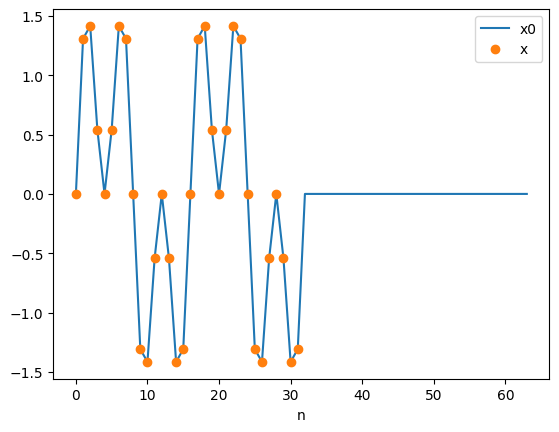

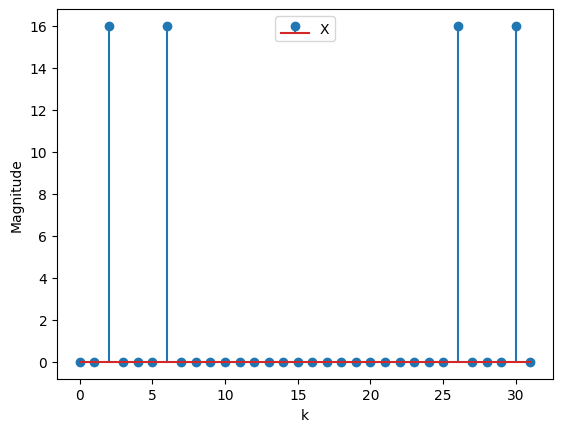

In [2]:
n=arange(64)
x1=sin(2*arange(32)*2*pi/32)
x2=sin(6*arange(32)*2*pi/32)
x = x1+x2
x0 = append(x,zeros(32))
X = fft(x)
plot(x0,label=("x0"))
plot(x, 'o', label=("x"))
xlabel("n")
legend()
figure()

stem(abs(X),label=("X"))
ylabel("Magnitude")
xlabel("k")
legend()
plt.show()

2) Obtenha os coeficientes de um filtro elíptico de quarta ordem com frequência normalizada de corte igual a 0,25 ($w=\pi/4$). Visualize a resposta em frequência do filtro calculado, e a DFT do sinal $x[n]$ no mesmo eixo, para frequências de 0 a $\pi$.

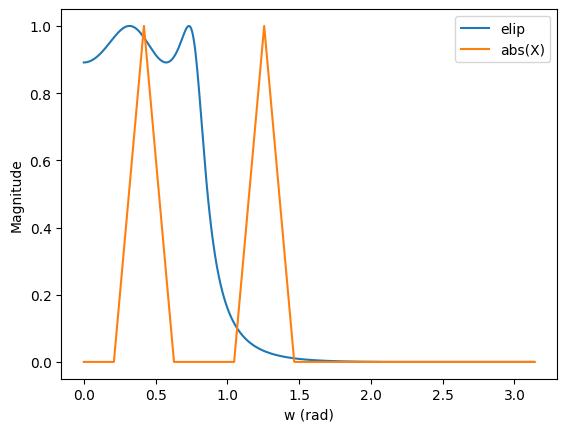

In [3]:
b, a = ellip(4, 1, 80, 0.25)
w, h  = freqz(b, a)
plot(w, abs(h), label=("elip"))
X = abs(fft(x))/16
w = linspace(0, pi, int(len(X)/2))
plot (w, X[0:16], label=("abs(X)"))
ylabel("Magnitude")
xlabel("w (rad)")
legend()
plt.show()

4) filtre o sinal $x_0[n]$ com a função aplicando a equação recursiva de diferenças com os coeficientes do filtro elíptico (função lfilter()) obtendo $y_1[n]$ com 64 pontos. 

In [4]:
y1 = lfilter(b, a, x0)

5) filtre o sinal $x[n]$ realizando a convolução com a resposta impulsional do filtro, obtendo sinal $y_2[n]$ com 64 pontos.<br>
Dica: pode-se obter a resposta ao impulso, $h[n]$, ao se aplicar um impulso $\delta[n]$ na entrada do filtro.

In [5]:
d = zeros(64)
d[0]=1
h2 = lfilter(b, a, d)
y2 = convolve(h2, x)

6) filtre o sinal $x_0[n]$, fazendo produto no domínio da frequência com a resposta em frequência do filtro obtendo $Y_3[k]=X[k] H[k]$, com 64 valores, e depois $y_3[n]$ pela transformada de Fourier inversa. Plote a magnitude de $Y_3[k]$ juntamente com a magnitude de $H[k]$, de $0...2\pi$.

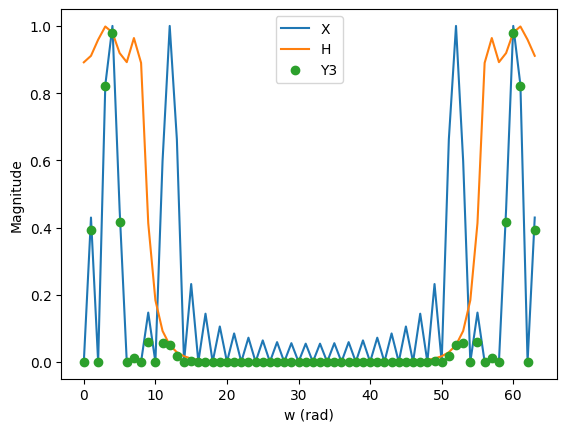

In [6]:
X0 = fft(x0)
H2 = fft(h2)
Y3 = X0*H2
y3 = real(ifft(Y3))
plot((abs(X0)/max(abs(X0))), label=("X"))
plot(abs(H2), label=("H"))
plot(abs(Y3)/16, 'o', label=("Y3"))
legend()
xlabel("w (rad)")
ylabel("Magnitude")
plt.show()

7) plote os 3 resultados no mesmo eixo: <br>
   a) No tempo: $y_1[n],y_2[n], y_3[n]$ <br>
   b) Em frequência: magnitudes de $Y_1[k],Y_2[k], Y_3[k]$ <br>

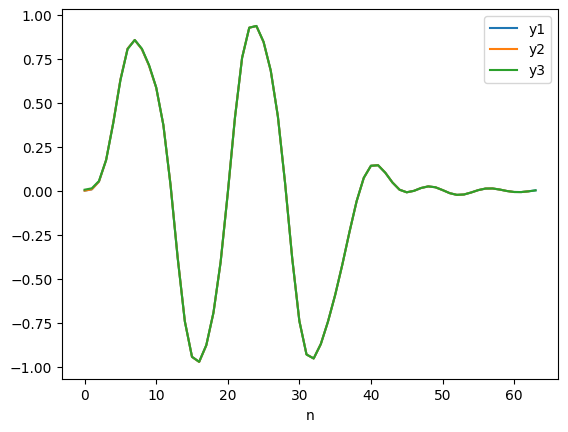

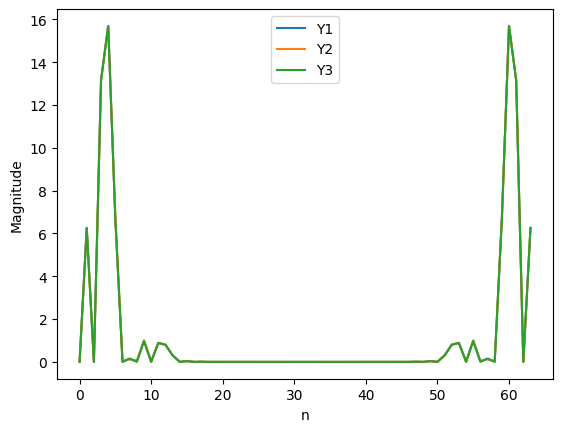

In [7]:
plot(y1, label="y1")
plot(y2[0:63], label="y2")
plot(y3, label="y3")
xlabel("n")
legend()
figure()
plot(abs(fft(y1)), label="Y1")
plot(abs(fft(y2[0:64])), label="Y2")
plot(abs(fft(y3)), label="Y3")
xlabel("n")
ylabel("Magnitude")
legend()
plt.show()